
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [14]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [15]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

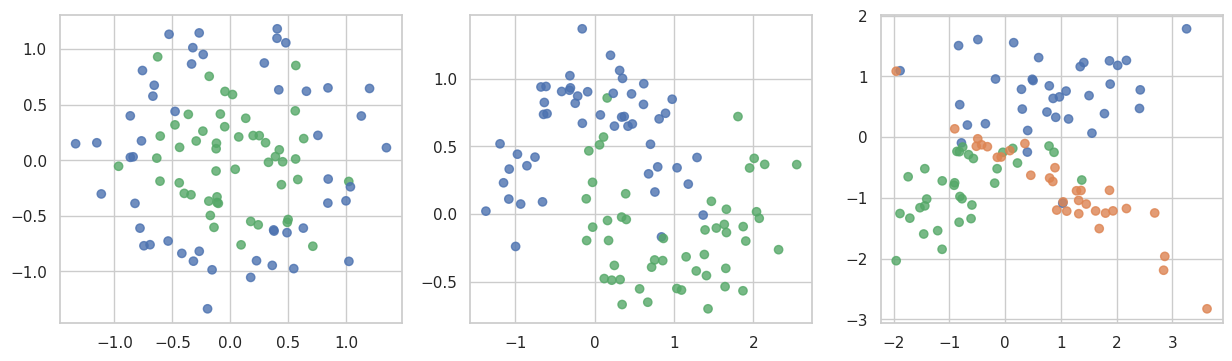

In [16]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [17]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

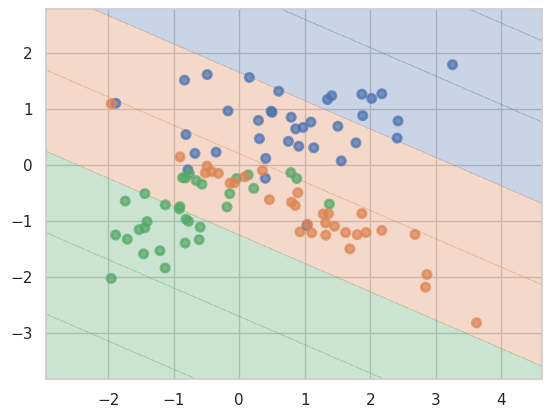

In [18]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [19]:
from sklearn.metrics import accuracy_score

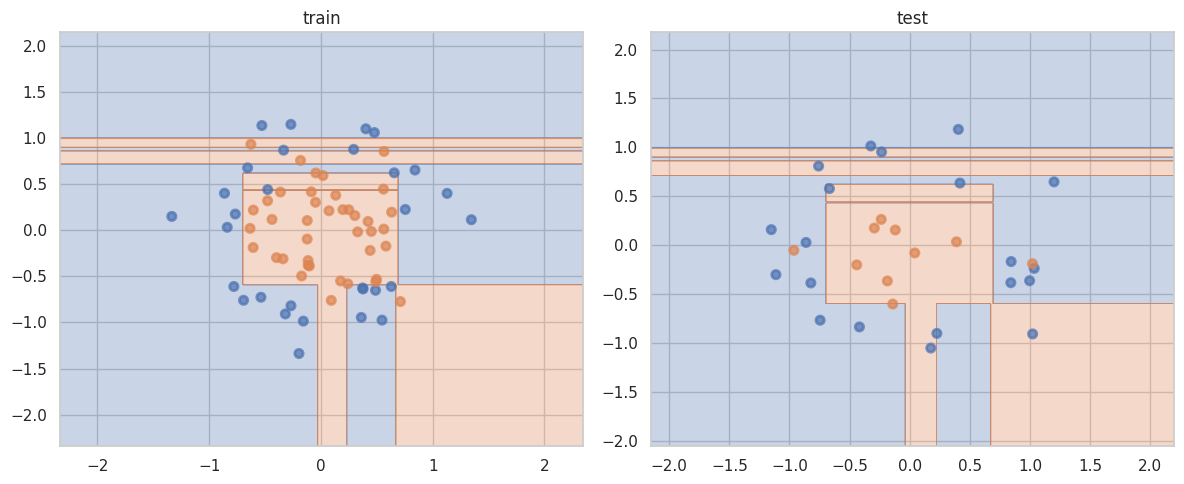

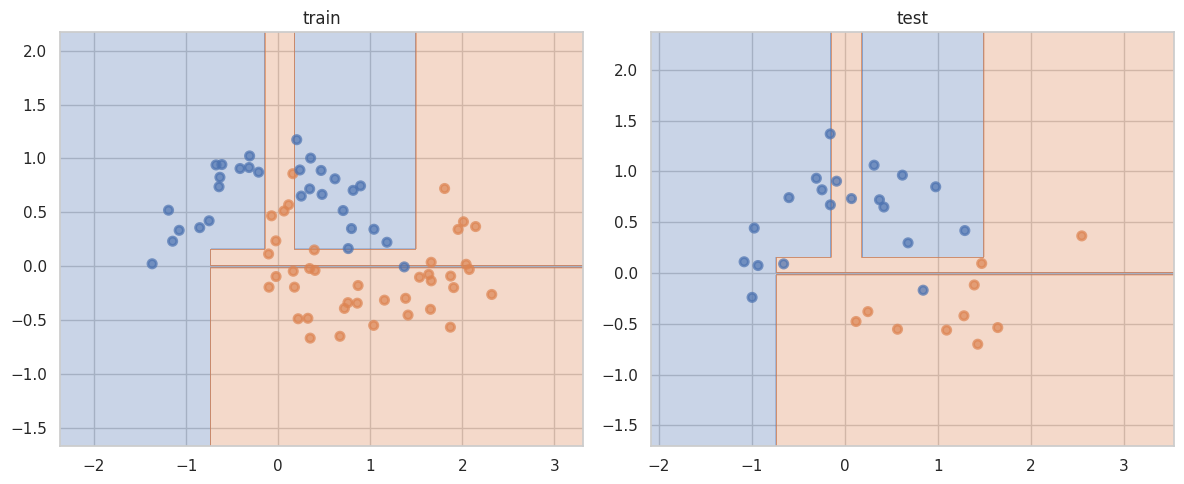

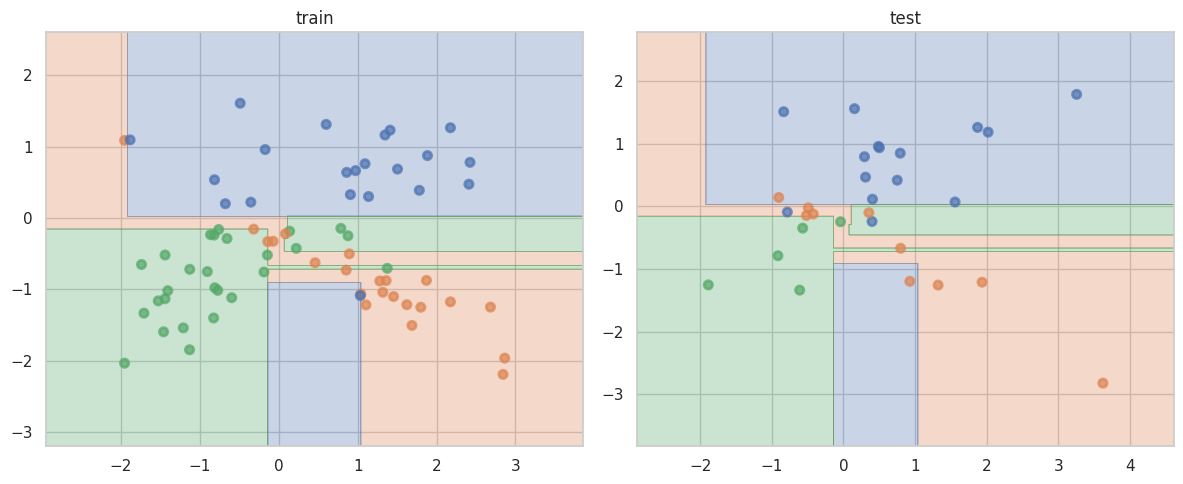

In [20]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
results = []
for i, (x, y) in enumerate(datasets, 1):
    x0, x1, y0, y1 = train_test_split(x, y, test_size=0.3, random_state=42)
    m = DecisionTreeClassifier().fit(x0, y0)
    p = accuracy_score(y0, m.predict(x0))
    q = accuracy_score(y1, m.predict(x1))
    results.append((i, p, q))
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plt.sca(ax[0]); plot_surface(m, x0, y0); plt.title("train")
    plt.sca(ax[1]); plot_surface(m, x1, y1); plt.title("test")
    plt.tight_layout(); plt.show()

In [21]:
for i, train_acc, test_acc in results:
    print(f"#{i} train={train_acc:.2f}, test={test_acc:.2f}")

#1 train=1.00, test=0.70
#2 train=1.00, test=0.87
#3 train=1.00, test=0.77


__Ответ:__ явно переобучились, тупо запомнили на трейне

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

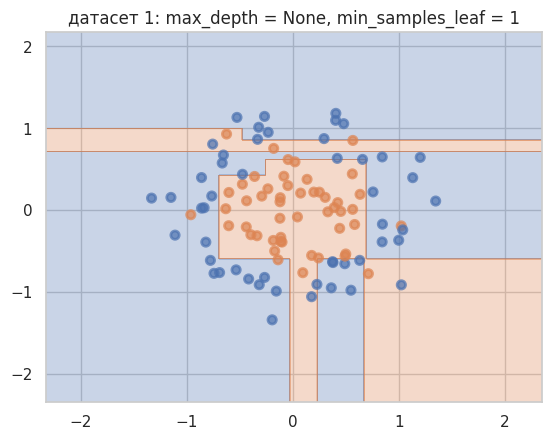

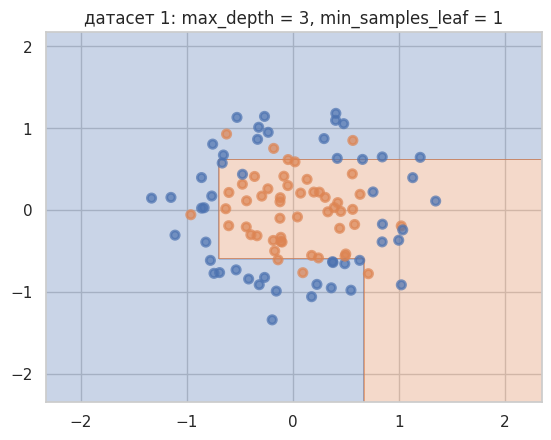

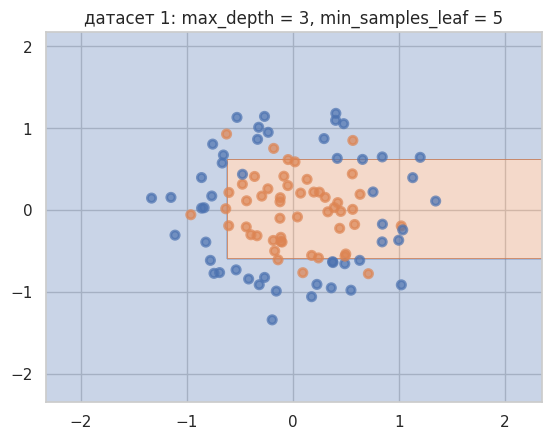

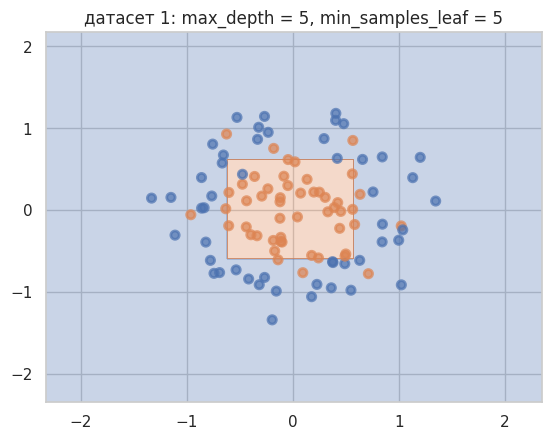

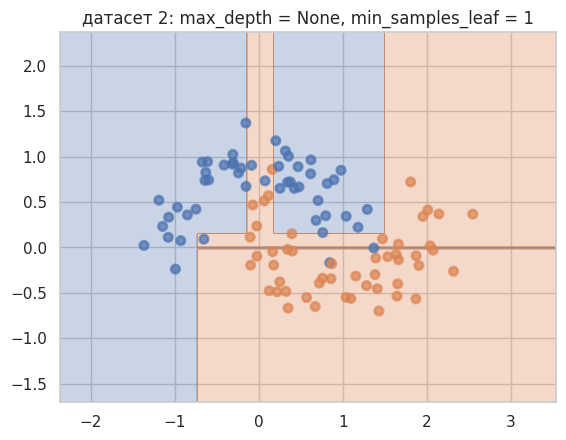

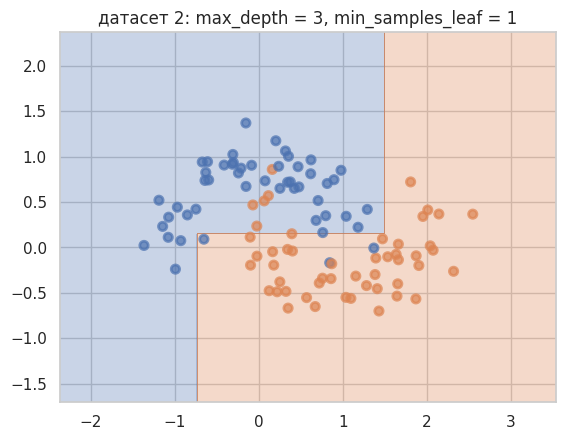

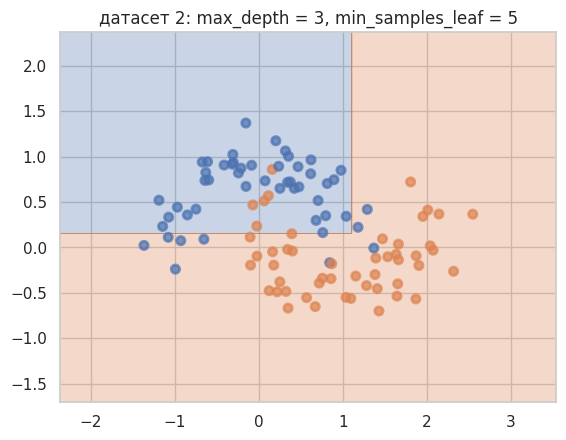

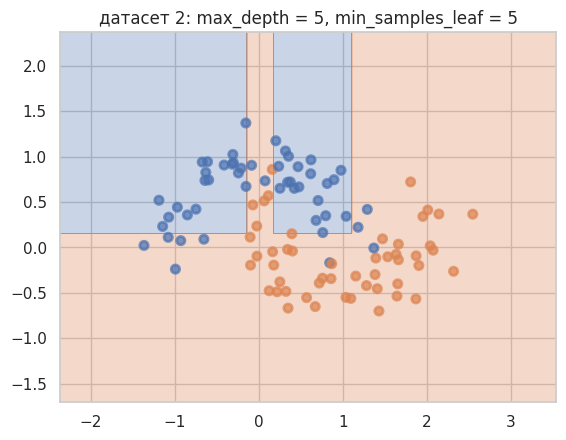

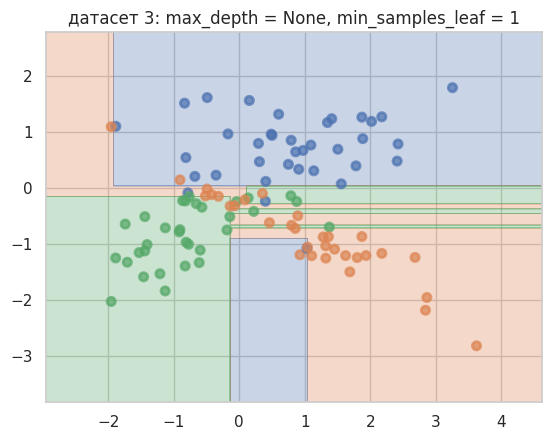

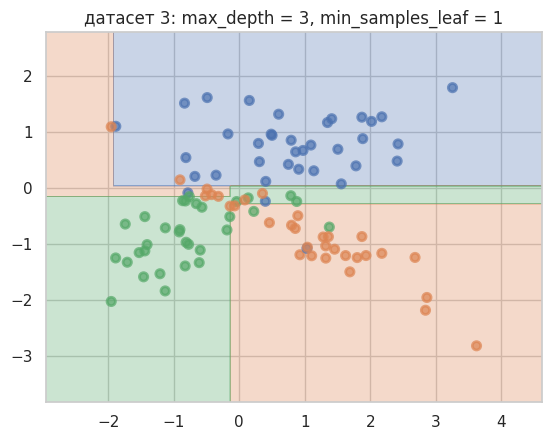

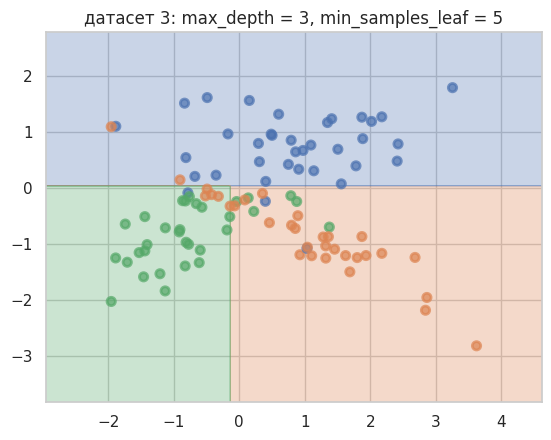

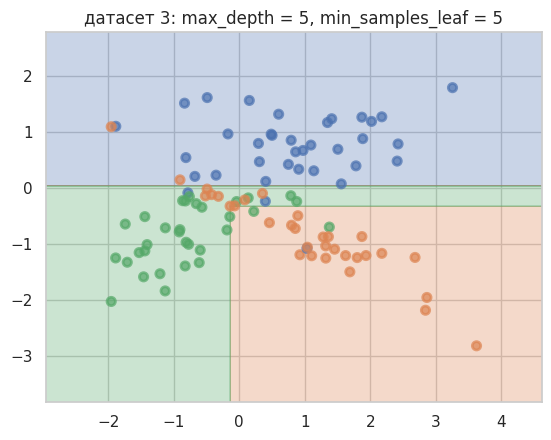

In [22]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
params = [(None, 1), (3, 1), (3, 5), (5, 5)]
for idx, (X, y) in enumerate(datasets, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    for max_depth, min_leaf in params:
        model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_leaf)
        model.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc  = accuracy_score(y_test,  model.predict(X_test))
        plot_surface(model, X, y)
        plt.title(f"датасет {idx}: max_depth = {max_depth}, min_samples_leaf = {min_leaf}")
        plt.show()

In [23]:
print(f"датасет {idx}: max_depth = {max_depth}, min_samples_leaf = {min_leaf}, train_accuracy = {train_acc:.2f}, test_accuracy = {test_acc:.2f}")

датасет 3: max_depth = 5, min_samples_leaf = 5, train_accuracy = 0.90, test_accuracy = 0.77


__Ответ:__ с одной стороный регуляризация не даёт дереву зацепиться за каждый шум, но из-за этого теряются мелкие детали и на таких себе данных(не оч чистых) тяжело её подобрать. на простых в принципе можно и не делать

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [24]:
df = pd.read_csv('students.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.2 KB
    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0


In [25]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
df = pd.read_csv('students.csv')
feature_names = list(df.columns[:-1])
target_vector = df['UNS'].values
num_samples = len(target_vector)
best_ginis = []

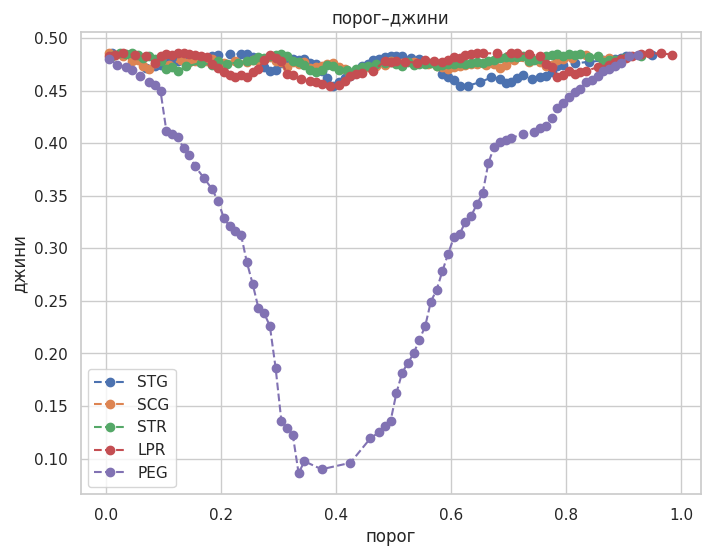

In [26]:
plt.figure(figsize=(8,6))
for feature_name in feature_names:
    feature_values = df[feature_name].values
    unique_values = np.unique(feature_values)
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2
    gini_scores = []
    for threshold in thresholds:
        left_labels = target_vector[feature_values < threshold]
        right_labels = target_vector[feature_values >= threshold]
        if left_labels.size == 0 or right_labels.size == 0:
            gini_scores.append(np.nan)
        else:
            p_left = left_labels.mean()
            gini_left = 1 - p_left**2 - (1 - p_left)**2
            p_right = right_labels.mean()
            gini_right = 1 - p_right**2 - (1 - p_right)**2
            weighted_gini = (left_labels.size/num_samples) * gini_left + (right_labels.size/num_samples) * gini_right
            gini_scores.append(weighted_gini)
    plt.plot(thresholds, gini_scores, marker='o', linestyle='--', label=feature_name)
plt.xlabel('порог'); plt.ylabel('джини'); plt.title('порог–джини'); plt.legend(); plt.show()

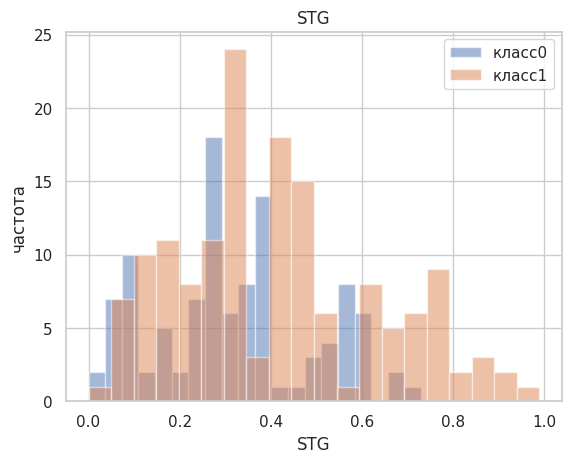

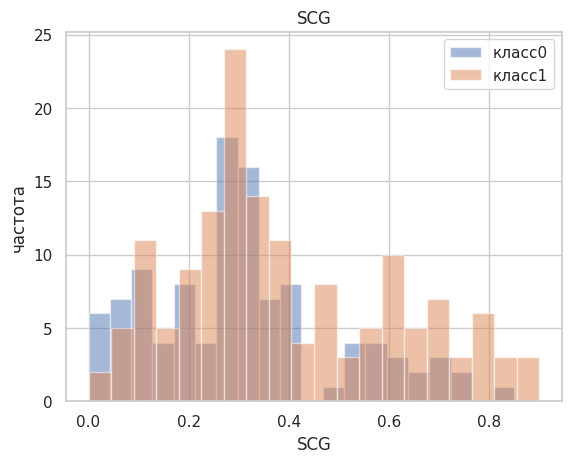

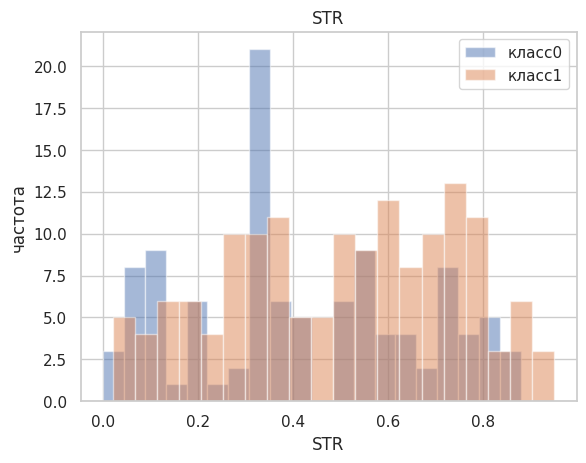

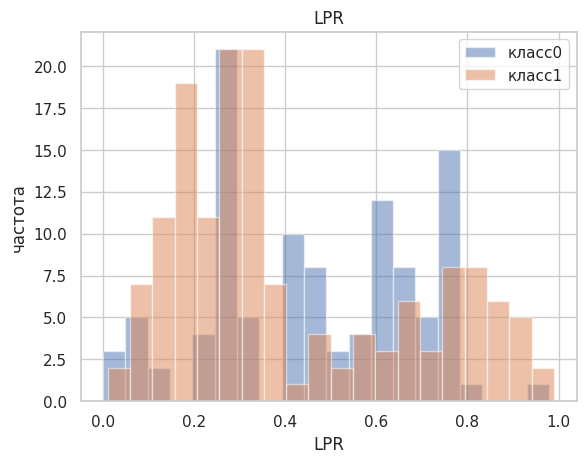

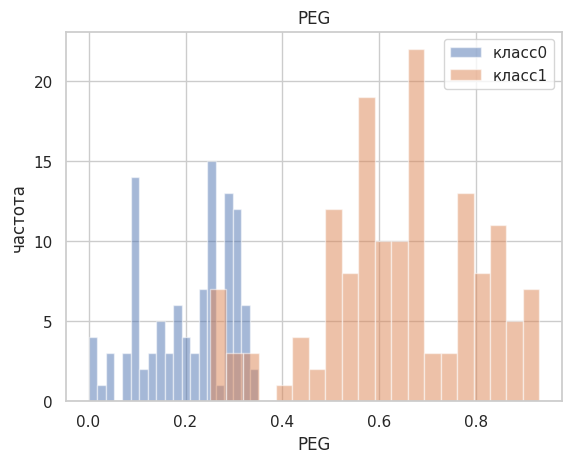

In [27]:
for feature_name in feature_names:
    plt.hist(df[feature_name][target_vector == 0], bins=20, alpha=0.5, label='класс0')
    plt.hist(df[feature_name][target_vector == 1], bins=20, alpha=0.5, label='класс1')
    plt.xlabel(feature_name); plt.ylabel('частота'); plt.legend(); plt.title(feature_name); plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** догадываюсь что нужен PEG, т.к. проседает при 0.35-0.4. На другом графике у PEG тоже четко видно разделение классов. Судя по всему для хороших признаков кривая должна быть воронка-образная, параболическая(что-то в этом роде). у плохих почти прямая линия

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




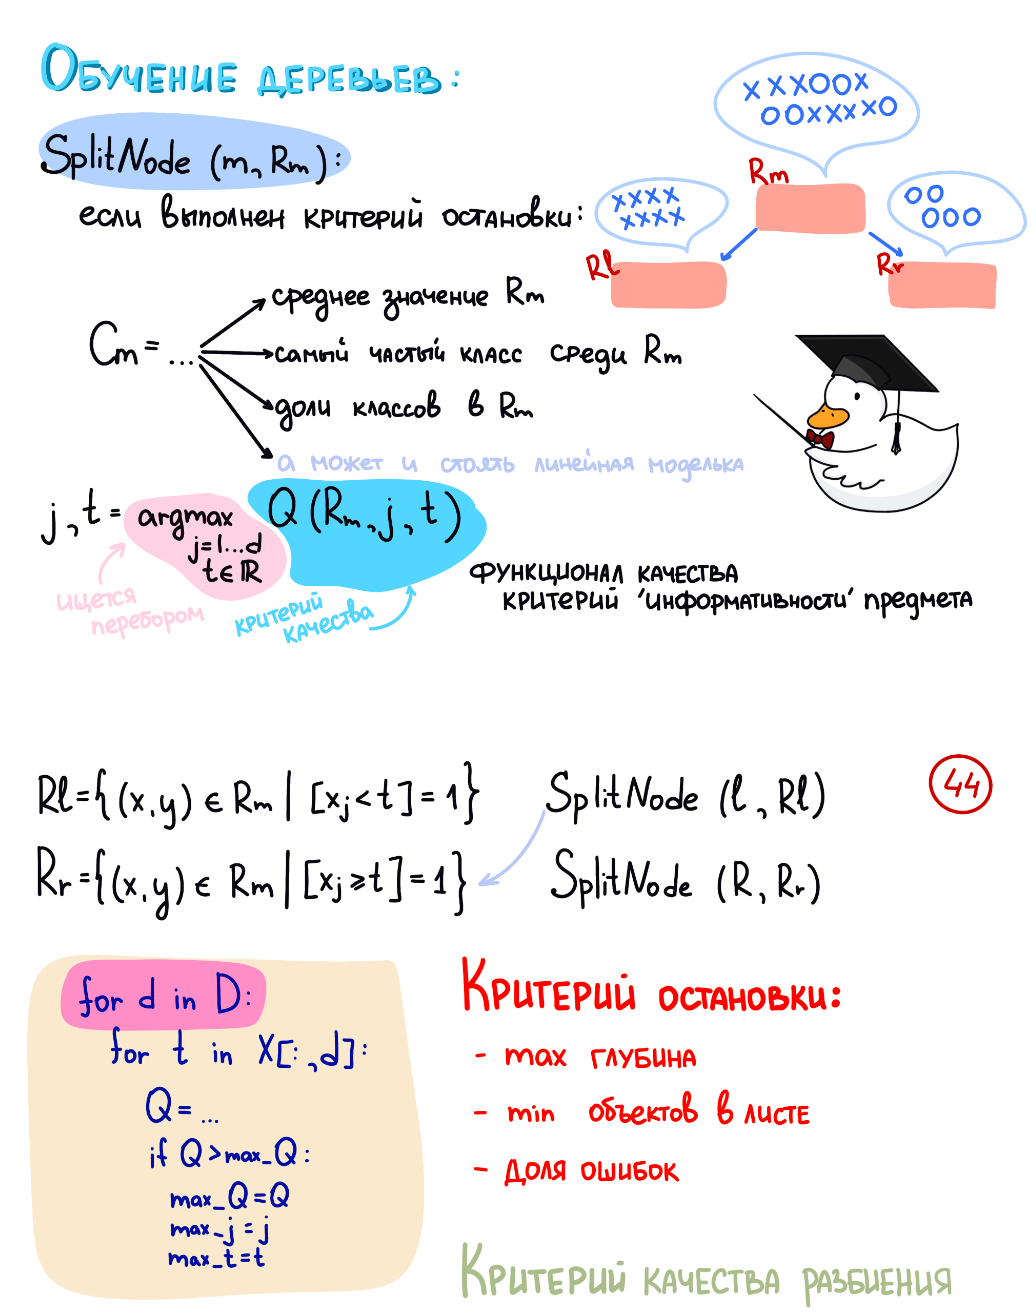

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tree_code import DecisionTree

In [29]:
names = []
with open('agaricus-lepiota.names') as f:
    for ln in f:
        if ln.startswith('|') or not ln.strip(): continue
        if ':' in ln:
            names.append(ln.split(':')[0].strip())
cols = ['class'] + names

In [30]:
df = pd.read_csv('agaricus-lepiota.data', header=None, names=cols)
y  = LabelEncoder().fit_transform(df['class'])
X  = df.drop(columns='class').apply(LabelEncoder().fit_transform).values

In [31]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [32]:
ftypes = ['categorical'] * X.shape[1]
tree   = DecisionTree(ftypes)
tree.fit( X_tr, y_tr)
pred   = tree.predict( X_te)

In [33]:
print('accuracy:', accuracy_score(y_te, pred))

accuracy: 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from tree_code import DecisionTree

In [36]:
class WrappedTree(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types):
        self.feature_types = feature_types
    def fit(self, X, y):
        self.clf = DecisionTree(self.feature_types)
        self.clf.fit(X, y)
        return self
    def predict(self, X):
        return self.clf.predict(X)

In [37]:
scorer = make_scorer(accuracy_score)
datasets = {}

In [38]:
df_m = pd.read_csv('agaricus-lepiota.data', header=None)
y_m = LabelEncoder().fit_transform(df_m.iloc[:, 0])
X_m = df_m.iloc[:, 1:].apply(LabelEncoder().fit_transform).values
datasets['mushrooms'] = (X_m, y_m)

In [39]:
df_t = pd.read_csv('tic-tac-toe-endgame.csv', header=None)
y_t = LabelEncoder().fit_transform(df_t.iloc[:, -1])
X_t = df_t.iloc[:, :-1].apply(LabelEncoder().fit_transform).values
datasets['tic-tac-toe'] = (X_t, y_t)

In [40]:
df_c = pd.read_csv('car.data', header=None)
y_c = df_c.iloc[:, -1].map({'unacc':0,'acc':0,'good':1,'vgood':1}).values
X_c = df_c.iloc[:, :-1].apply(LabelEncoder().fit_transform).values
datasets['cars'] = (X_c, y_c)

In [41]:
df_n = pd.read_csv('nursery.data', header=None)
y_n = df_n.iloc[:, -1].map({'not_recom':0,'recommend':0,'very_recom':1,'priority':1,'spec_prior':1}).values
X_n = df_n.iloc[:, :-1].apply(LabelEncoder().fit_transform).values
datasets['nursery'] = (X_n, y_n)

In [42]:
results = pd.DataFrame(index=datasets.keys(),columns=['DT_real','DT_cat','DT_real_ohe','sk_DT'])

In [43]:
for name, (X, y) in datasets.items():
    cv = min(10, len(y))

    dt_real = WrappedTree(['real'] * X.shape[1])
    results.loc[name,'DT_real'] = cross_val_score(dt_real, X, y, cv=cv, scoring=scorer).mean()

    dt_cat = WrappedTree(['categorical'] * X.shape[1])
    results.loc[name,'DT_cat'] = cross_val_score(dt_cat, X, y, cv=cv, scoring=scorer).mean()

    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X)
    dt_ohe = WrappedTree(['real'] * X_ohe.shape[1])
    results.loc[name,'DT_real_ohe'] = cross_val_score(dt_ohe, X_ohe, y, cv=cv, scoring=scorer).mean()

    sk_dt = DecisionTreeClassifier()
    results.loc[name,'sk_DT'] = cross_val_score(sk_dt, X, y, cv=cv, scoring=scorer).mean()

In [44]:
print(results)

              DT_real    DT_cat DT_real_ohe     sk_DT
mushrooms    0.999261       1.0    0.999631  0.960384
tic-tac-toe  0.497083   0.60125    0.574167  0.790559
cars         0.942647  0.967546    0.919495  0.942707
nursery      0.999691  0.999846    0.999537  0.999691


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


нет, алгоритмы не ранжируются одинаково. в mushrooms cars и nursery просто категориальное дерево даёт результаты получше, а в крестиках ноликаз лучше глубокое дерево из sklearn. там, где есть ключевые признаки, простые пороговые сплиты по категориям дают ну почти идеальное разделение. а в крестиках комбинаций слишком много, и только более глубокие разбиения ловят паттерны. случайная компонента есть: разные разбиения на фолды могут дать чуть другие цифры на кросс-валидации. чтобы улучшить можно отфильтровать или обобщить шумные и редко встречающиеся категории (target-encoding например), выбрать по-настоящему важные фичи через feature-selection, попробовать другой критерий сплита (энтропию вместо Джини) и сделать прунинг. возможно ещё можно собрать несколько таких упрощённых деревьев в бустинг чтобы они усредняли ошибки.

# Как дела?

In [45]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

да в целом пойдет, но было и лучше. не понимаю зачем и почему существуют непрофильные предметы в магистратуре(!!). ладно бакалавр, но в маге год учить английский язык это абсурд и пустая трата времени, кому надо он и сам выучит. я конечно понимаю что за них вряд ли кого-то отчислят, но всё равно не очень приятно получать пересдачу по такому предмету.
P.S. стало легче на душе)

ещё небольшой вопрос: лекции Жени Соколова советуете посмотреть для закрепления всего пройденного?